# Neural Network Regression: End-to-End Workflow
This notebook adapts your regression model comparison workflow to use a neural network (Keras/TensorFlow) for regression, including data loading, preprocessing, training, evaluation, and visualization.

## 1. Import Required Libraries
Import pandas, numpy, matplotlib, seaborn, scikit-learn, and TensorFlow/Keras for data analysis, visualization, and modeling.

In [4]:
!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

You should consider upgrading via the 'C:\Users\ashokcha\git-repos\ml-algo\venv1\Scripts\python.exe -m pip install --upgrade pip' command.


## 2. Load and Explore the Data
Load your dataset, display the first few rows, check for missing values, and summarize the data.

In [5]:
# Load the data (replace with your file path)
df = pd.read_csv(r'C:\MLData\8psx_data_120_cleaned.csv')
df.head()

,DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,DBL4_0.65D_PLVT_D2X1S_60PP[PLVT_D2X1S_60PP]@50%@ETEST,REXTB4_0.05D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,RLMGN_GATE/NS/DFMAX/L_60PP_SL[GATE/NS/DFMAX/L_60PP_SL]@50%@ETEST,RL_0.1V_M0_22B_SL[M0_22B_SL]@50%@ETEST,IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT
0,62.411005,76.988180,44.747650,2.802551,392.51925,15014.38007
1,58.434730,88.828865,44.939340,3.116242,380.59920,15167.33525
2,55.158895,78.538745,41.367725,2.591772,310.17180,NaN
3,58.878395,74.881965,45.074160,2.508621,408.16270,14556.75514
4,62.129235,89.732230,45.279775,2.925623,377.48580,14920.56144


In [6]:
# Check for missing values and summarize the data
print('Missing values per column:')
print(df.isnull().sum())
df.describe()

Missing values per column:
DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST                  0
DBL4_0.65D_PLVT_D2X1S_60PP[PLVT_D2X1S_60PP]@50%@ETEST                  0
REXTB4_0.05D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST                0
RLMGN_GATE/NS/DFMAX/L_60PP_SL[GATE/NS/DFMAX/L_60PP_SL]@50%@ETEST       0
RL_0.1V_M0_22B_SL[M0_22B_SL]@50%@ETEST                                 0
IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT                     2702
dtype: int64


,DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,DBL4_0.65D_PLVT_D2X1S_60PP[PLVT_D2X1S_60PP]@50%@ETEST,REXTB4_0.05D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,RLMGN_GATE/NS/DFMAX/L_60PP_SL[GATE/NS/DFMAX/L_60PP_SL]@50%@ETEST,RL_0.1V_M0_22B_SL[M0_22B_SL]@50%@ETEST,IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT
count,3602.000000,3602.000000,3602.000000,3602.000000,3602.000000,900.000000
mean,62.616373,81.979360,43.350124,2.846914,362.531748,14990.903028
std,3.841165,6.936161,2.145500,0.209396,31.523580,243.140863
min,51.333005,62.142460,35.604915,2.202289,284.825650,14275.630860
25%,59.964984,77.211357,41.999036,2.705536,338.639200,14827.781665
50%,62.400548,81.589375,43.382275,2.837588,360.216500,14989.114615
75%,65.078806,86.391449,44.758429,2.976218,383.962713,15157.202000
max,77.762155,118.791900,52.557930,3.783915,503.889800,15763.913380


## 3. Preprocess the Data
Handle missing values, encode categorical variables, and scale/normalize features as needed.

In [7]:
# Drop rows with missing target and fill other missing values with column mean
target_col = 'IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT'  # Update to your target column name
if df[target_col].isnull().any():
    df = df.dropna(subset=[target_col])
df = df.fillna(df.mean(numeric_only=True))
# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.drop(target_col, errors='ignore')
df = pd.get_dummies(df, columns=categorical_cols)
# Optional: scale features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns.drop(target_col)] = scaler.fit_transform(df[df.columns.drop(target_col)])
df.head()

,DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,DBL4_0.65D_PLVT_D2X1S_60PP[PLVT_D2X1S_60PP]@50%@ETEST,REXTB4_0.05D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,RLMGN_GATE/NS/DFMAX/L_60PP_SL[GATE/NS/DFMAX/L_60PP_SL]@50%@ETEST,RL_0.1V_M0_22B_SL[M0_22B_SL]@50%@ETEST,IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT
0,0.583983,-0.665350,0.072549,-0.237984,0.375063,15014.38007
1,-0.694705,1.067179,0.186654,1.573079,-0.271946,15167.33525
3,-0.552032,-0.973531,0.266907,-1.934966,1.224174,14556.75514
4,0.493372,1.199360,0.389301,0.472560,-0.440939,14920.56144
5,-1.023205,-0.399438,1.584636,1.120705,1.867511,14443.94676


## 4. Feature Selection
Select top correlated features with the target variable using correlation analysis.

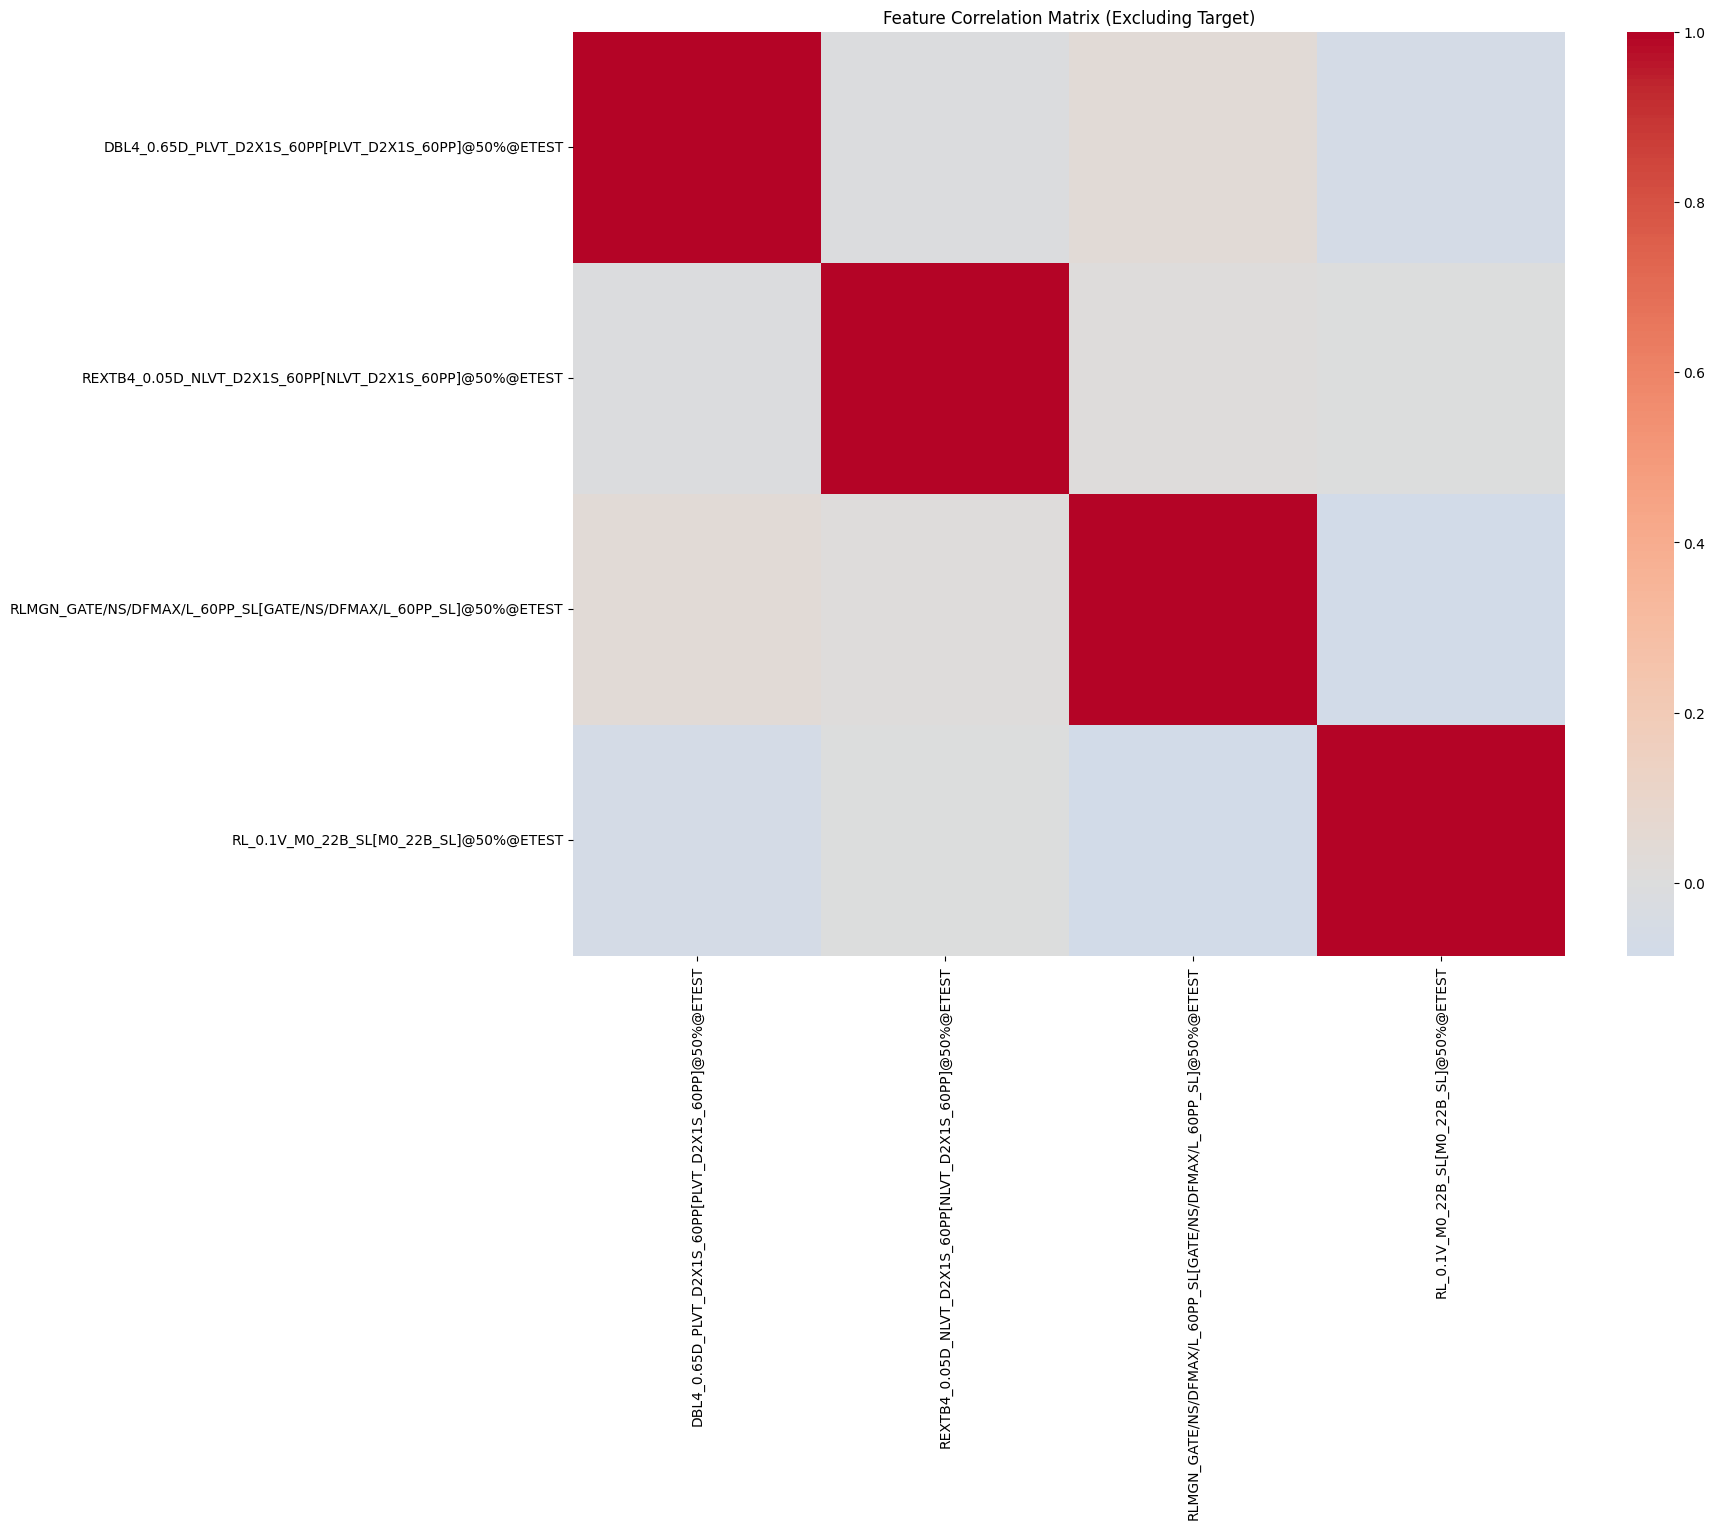

C:\Users\ashokcha\AppData\Local\Temp\ipykernel_13852\944612632.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values[:top_n], y=correlations.index[:top_n], palette='coolwarm')


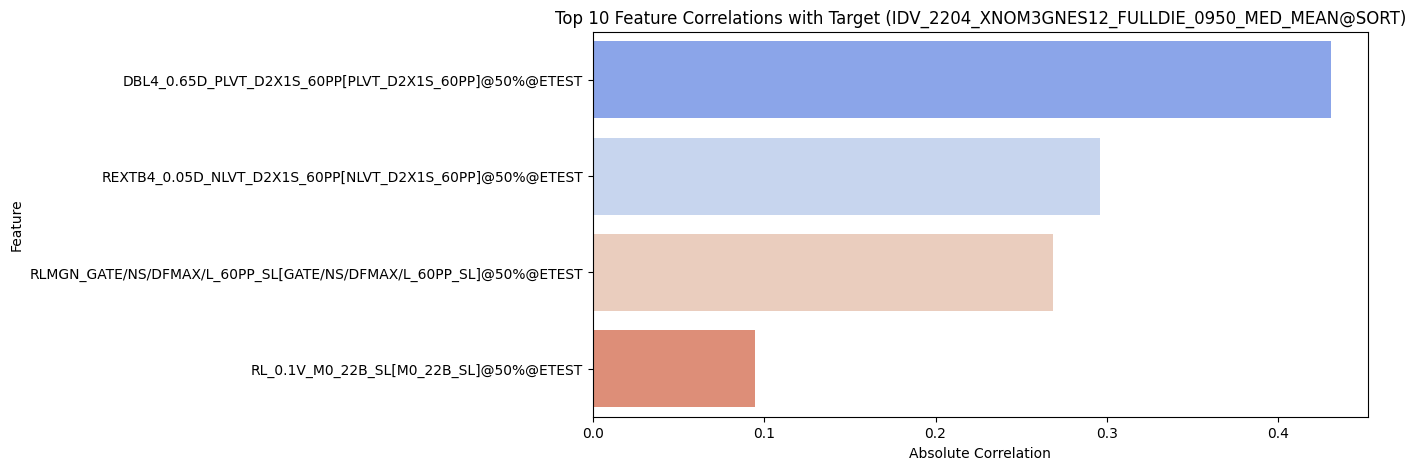

In [ ]:
# Remove unwanted feature column if present
# unwanted_col = 'DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST'
# if unwanted_col in df.columns:
#     df = df.drop(columns=[unwanted_col])
# Correlation of each feature with the target column
correlations = df.corr()[target_col].drop(target_col).abs().sort_values(ascending=False)
# Plot full correlation matrix as a heatmap (excluding target column)
corr_features = df.drop(columns=[target_col]).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_features, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Excluding Target)')
plt.show()
# Bar plot of top 10 feature correlations with target
top_n = 10
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.values[:top_n], y=correlations.index[:top_n], palette='coolwarm')
plt.title(f'Top {top_n} Feature Correlations with Target ({target_col})')
plt.xlabel('Absolute Correlation')
plt.ylabel('Feature')
plt.show()
# Select top correlated features for modeling
top_features = correlations.index[:top_n].tolist()

## 5. Split Data into Training and Test Sets
Split the dataset into training and test sets using the selected features.

In [9]:
# Prepare X and y, then split into train and test sets
X = df[top_features]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 720, Test samples: 180


## 6. Build the Neural Network Model
Define a simple feedforward neural network using Keras.

In [10]:
# Define a simple feedforward neural network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

## 7. Compile the Model
Configure the model with an optimizer, loss function, and evaluation metrics.

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 8. Train the Model
Fit the model to the training data and monitor the training process.

In [12]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 224704880.0000 - mae: 14988.3271 - val_loss: 224327952.0000 - val_mae: 14975.7676
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 224509008.0000 - mae: 14981.5547 - val_loss: 224295280.0000 - val_mae: 14974.6758
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 225045104.0000 - mae: 14999.5625 - val_loss: 224243824.0000 - val_mae: 14972.9580
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 224723920.0000 - mae: 14988.7314 - val_loss: 224166208.0000 - val_mae: 14970.3662
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 224509264.0000 - mae: 14981.7090 - val_loss: 224053456.0000 - val_mae: 14966.5986
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 224643808.0000 - mae: 14986.2900 - val_loss: 223894592.0000 - val_mae: 14961.2900
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 224207472.0000 - mae: 14971.7539 - val_loss: 223678384.0000 - val_mae: 14954.0586
Epoch 8/

## 9. Evaluate the Model
Assess the model's performance on the test data using MAE and R2 score.

In [13]:
# Evaluate on test set
y_pred = model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MAE: {mae:.3f}")
print(f"Test R2: {r2:.3f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test MAE: 1796.758
Test R2: -79.272


## 10. Visualize Training History
Plot the training and validation loss and MAE curves.

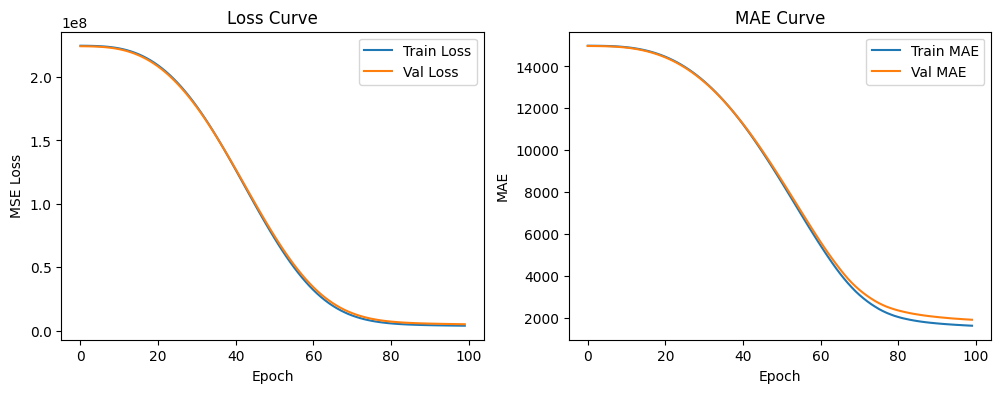

In [14]:
# Plot training & validation loss and MAE
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Val Loss')
ax[0].set_title('Loss Curve')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('MSE Loss')
ax[0].legend()
ax[1].plot(history.history['mae'], label='Train MAE')
ax[1].plot(history.history['val_mae'], label='Val MAE')
ax[1].set_title('MAE Curve')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('MAE')
ax[1].legend()
plt.show()

## 11. Make Predictions
Use the trained model to make predictions on new or test data samples.

In [15]:
# Predict on a few test samples
sample_idx = np.random.choice(len(X_test), 5, replace=False)
sample_X = X_test.iloc[sample_idx]
sample_y = y_test.iloc[sample_idx]
pred_y = model.predict(sample_X)
print('True values:', sample_y.values)
print('Predicted values:', pred_y.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
True values: [14959.89246 14851.05905 15419.59467 15219.42065 15161.032  ]
Predicted values: [11921.368 12721.796 13713.603 20582.787 11685.826]


## 12. Regression Metrics and Visualization
For regression, common metrics are:
- MAE (Mean Absolute Error): Average absolute difference between predicted and true values.
- MSE (Mean Squared Error): Average squared difference between predicted and true values.
- RMSE (Root Mean Squared Error): Square root of MSE.
- R² (Coefficient of Determination): Proportion of variance explained by the model ("accuracy" for regression).

Below is a graph comparing true vs. predicted values and a residual plot.

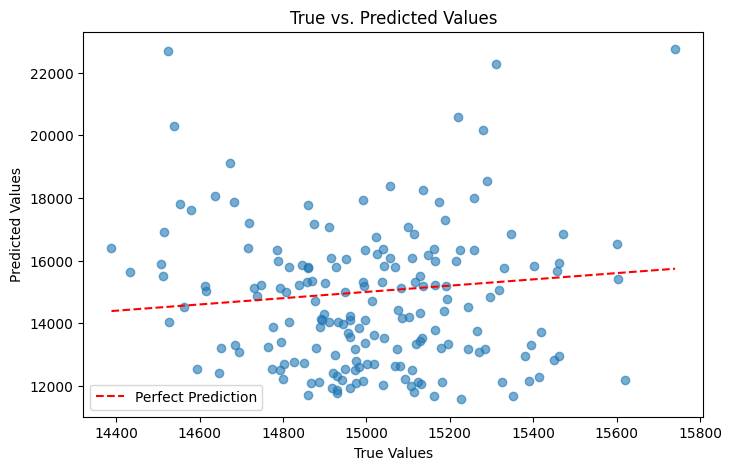

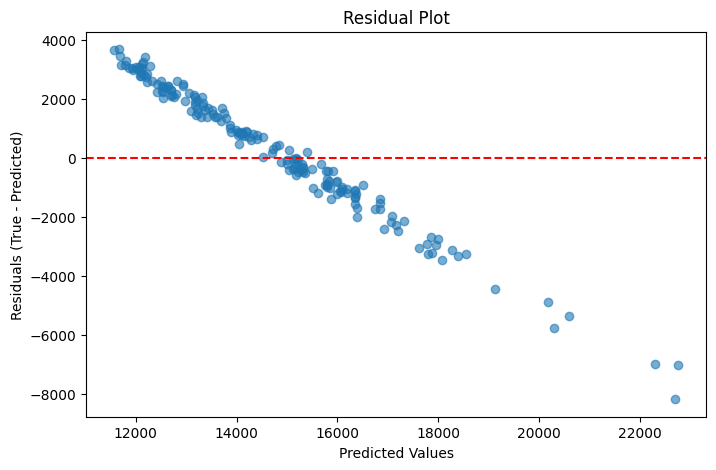

In [16]:
# True vs. Predicted values scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Plot')
plt.show()